In [16]:
import matlab.engine
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import psycopg2

In [25]:
conn = psycopg2.connect("dbname=local user=postgres password=root")
cur = conn.cursor()

In [26]:
c=0
cur.execute("CREATE TABLE HyLITE_SM_TuningParameter{0} (id SERIAL PRIMARY KEY, timestampe float, H_inertia float,r_fd float, r_1d float, r_1q float, r_2q float, x_ddd float, x_qdd float, r_str float, Tr float, Tb float, Tc float,Ka float,Ta float, Kc float, K float, T1 float, T2 float, T3 float, T4 float)".format(c))
#cur.fetchall()

In [27]:
cur.

ProgrammingError: no results to fetch

In [22]:
len("id SERIAL PRIMARY KEY, timestampe float, H_inertia float,r_fd float, r_1d float, r_1q float, r_2q float, x_ddd float, x_qdd float, r_str float, Tr float, Tb float, Tc float,Ka float,Ta float, Kc float, K float, T1 float, T2 float, T3 float, T4 float".split(","))

21

In [17]:
import scipy.io

In [18]:
def dump_df(cursor,name,df,replace= False):
    
    exist_flag = False
    
    mycursor.execute("SHOW TABLES;")
  
    for x in mycursor:
        if name == x[0]:
            exist_flag = True
    
    if exist_flag:
        drop_it = "drop table {0}".format(name)
        if replace:
            cursor.execute(drop_it)
            mydb.commit()
            print("table: {0} has been droped".format(name))
    
    # create part
    sql = '''Create table '''+ str(name)+"(id SERIAL PRIMARY KEY, timestampe float, H_inertia float,r_fd float, r_1d float, r_1q float, r_2q float, x_ddd float, x_qdd float, r_str float, Tr float, Tb float, Tc float,Ka float,Ta float, Kc float, K float, T1 float, T2 float, T3 float, T4 float);"
    
    print(sql)
    
    mycursor.execute(sql)
    mydb.commit()
    # insert part
    
    
    for i in list(df.index):
        cols = "("+",".join(columns)+")"
        temp = "INSERT INTO "+str(name)+ cols +" VALUES"
        # adding formater

        mycursor.execute(temp+ "("+",".join([str(each) for each in list(df.iloc[i])])+");")
        mydb.commit()
    #print("\n\n",sql)
    
    '''for i in sql.split(";"):
        mycursor.execute(i)
    '''
        

    


## making a connection with database

In [19]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="#Include76002",
    database = 'mysql'
)

mycursor = mydb.cursor(buffered=True)

def refresh():
    global mydb,mycursor
    mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="#Include76002",
    database = 'mysql'
    )

    mycursor = mydb.cursor(buffered=True)



## loading the simulink model

In [20]:
eng = matlab.engine.start_matlab()

In [21]:
sim_file ='Online_Estimation_Synchrongenerator_NEW.slx'

In [22]:
eng.eval("load_system('{}')".format(sim_file))

0.0001220703125

## reading the input from Databsae table named "input_mat"

In [23]:
df = pd.read_sql("select * from input_mat;", mydb)
mydb.commit()

In [24]:
scipy.io.savemat('temp.mat', {'input':df.values})
del df

In [25]:
eng.workspace['input'] = eng.load('temp.mat')['input']

## running the simulation

In [26]:
eng.sim(sim_file)
eng.workspace['data']=eng.eval("simout.Data")

In [35]:
eng.workspace['data'][-1]

matlab.double([1.00051,1.000505,1.0005,0.9897557,0.9897544,0.9897530999999999,0.9897518000000001,0.9897505,0.9897491999999999,0.9897479,0.9897465999999999,0.9897452999999999])

In [27]:
dat = pd.DataFrame([list(each) for each in eng.workspace['data']])
dat.head(10)

0    1    2    3    4    5    6    7    8    9    10   11
0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
1  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
2  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
3  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0
5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
6  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0
7  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0
8  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0
9  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

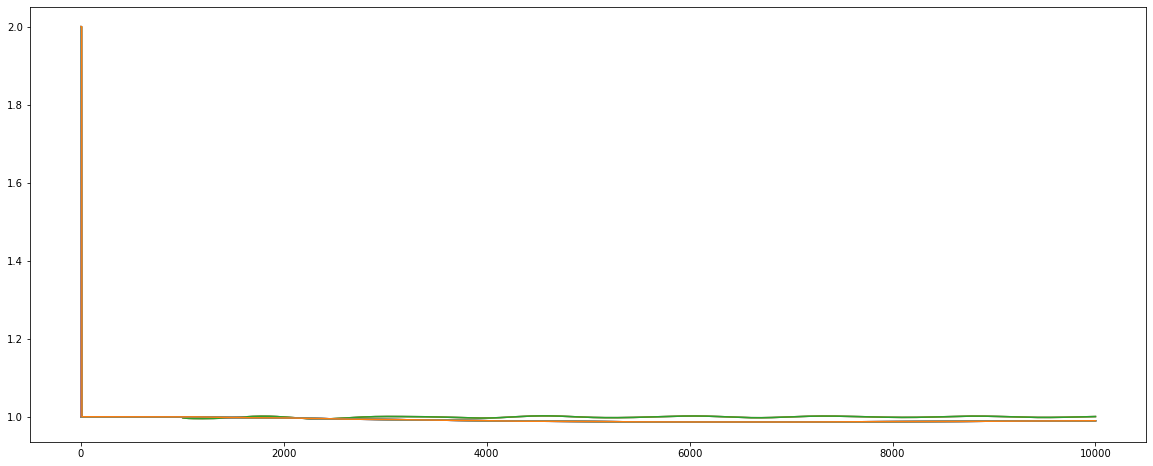

In [28]:
plt.figure(figsize=(20,8))
plt.plot(dat)
plt.show()

In [29]:
refresh()
dump_df(mycursor,'sim_out',dat,True)

Create table sim_out (A0 float(20), A1 float(20), A2 float(20), A3 float(20), A4 float(20), A5 float(20), A6 float(20), A7 float(20), A8 float(20), A9 float(20), A10 float(20), A11 float(20));


In [30]:
foo = pd.read_sql("select * from sim_out;", mydb)

In [31]:
foo

A0       A1       A2        A3        A4        A5        A6  \
0      1.00000  1.00000  1.00000  2.000000  2.000000  2.000000  2.000000   
1      1.00000  1.00000  1.00000  1.000000  2.000000  2.000000  2.000000   
2      1.00000  1.00000  1.00000  1.000000  1.000000  2.000000  2.000000   
3      1.00000  1.00000  1.00000  1.000000  1.000000  1.000000  2.000000   
4      1.00000  1.00000  1.00000  1.000000  1.000000  1.000000  1.000000   
...        ...      ...      ...       ...       ...       ...       ...   
9996   1.00049  1.00048  1.00048  0.989751  0.989749  0.989748  0.989747   
9997   1.00049  1.00049  1.00048  0.989752  0.989751  0.989749  0.989748   
9998   1.00050  1.00049  1.00049  0.989753  0.989752  0.989751  0.989749   
9999   1.00050  1.00050  1.00049  0.989754  0.989753  0.989752  0.989751   
10000  1.00051  1.00050  1.00050  0.989756  0.989754  0.989753  0.989752   

             A7        A8        A9       A10       A11  
0      2.000000  2.000000  2.000000  2.000000  2.000000  
1      2.000000  2.000000  2.000000  2.000000  2.000000  
2      2.000000  2.000000  2.000000  2.000000  2.000000  
3      2.000000  2.000000  2.000000  2.000000  2.000000  
4      2.000000  2.000000  2.000000  2.000000  2.000000  
...         ...       ...       ...       ...       ...  
9996   0.989745  0.989744  0.989743  0.989741  0.989740  
9997   0.989747  0.989745  0.989744  0.989743  0.989741  
9998   0.989748  0.989747  0.989745  0.989744  0.989743  
9999   0.989749  0.989748  0.989747  0.989745  0.989744  
10000  0.989751  0.989749  0.989748  0.989747  0.989745  

[10001 rows x 12 columns]